In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [2]:
data = pd.DataFrame()

In [3]:
data = pd.concat([
     pd.read_csv('{}/final_toxic_toxic_mBERT_result_combined_1.csv'.format(DATA_DIR)),
     pd.read_csv('{}/final_toxic_toxic_mBERT_result_combined_2.csv'.format(DATA_DIR))
    ])
data = data.sort_values(by=['total_data', 'foreign_mult', 'seed'])
print(data.shape)
data.head(10)

(576, 8)


,type,total_data,seed,foreign_mult,total_foreign_data,f1,recall,precision
0,B,500,1,-1.0,500,0.415914,0.920657,0.555739
1,B,500,2,-1.0,500,0.494035,0.818057,0.570067
2,B,500,3,-1.0,500,0.531105,0.767442,0.584984
0,B,500,4,-1.0,500,0.427680,0.166895,0.600985
1,B,500,5,-1.0,500,0.386111,0.099863,0.588710
2,B,500,6,-1.0,500,0.501396,0.638851,0.558612
3,A,500,1,0.0,0,0.393684,0.957592,0.555997
4,A,500,2,0.0,0,0.394466,0.960328,0.556701
5,A,500,3,0.0,0,0.395346,0.957592,0.556439
3,A,500,4,0.0,0,0.414507,0.935705,0.557912


In [4]:
data = data.groupby(['total_data', 'foreign_mult']).mean().reset_index()

# Plot F1 By Total Data for each Type

In [5]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
print(data.shape)
data.head(20)

(96, 7)


,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
0,500,-1.00,3.5,500.0,0.459373,0.568627,0.576516
1,500,0.00,3.5,0.0,0.398174,0.953716,0.556552
2,500,0.25,3.5,125.0,0.407097,0.907661,0.557701
3,500,0.50,3.5,250.0,0.407595,0.947560,0.558082
4,500,0.75,3.5,375.0,0.456673,0.919745,0.568995
5,500,1.00,3.5,500.0,0.434162,0.931601,0.563749
6,500,1.50,3.5,750.0,0.456914,0.896945,0.567571
7,500,2.00,3.5,1000.0,0.454154,0.903557,0.568209
8,500,3.00,3.5,1500.0,0.482899,0.906293,0.577056
9,500,4.00,3.5,2000.0,0.510389,0.917237,0.588826


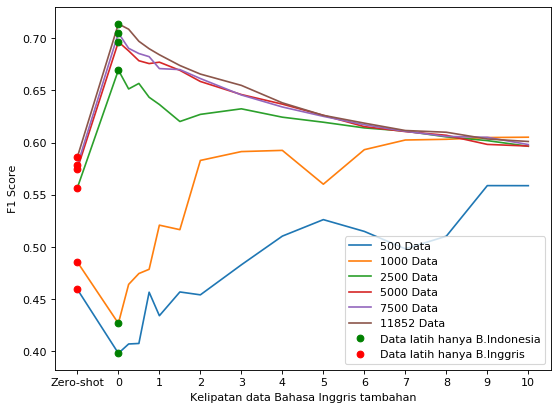

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 11852]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['foreign_mult'] == 0 )].foreign_mult.values,
data[(data['foreign_mult'] == 0)].f1.values,
'go',
label='Data latih hanya B.Indonesia'.format(x))

plt.plot(data[(data['foreign_mult'] == -1)].foreign_mult.values,
data[(data['foreign_mult'] == -1)].f1.values,
'ro',
label='Data latih hanya B.Inggris'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data Bahasa Inggris tambahan')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

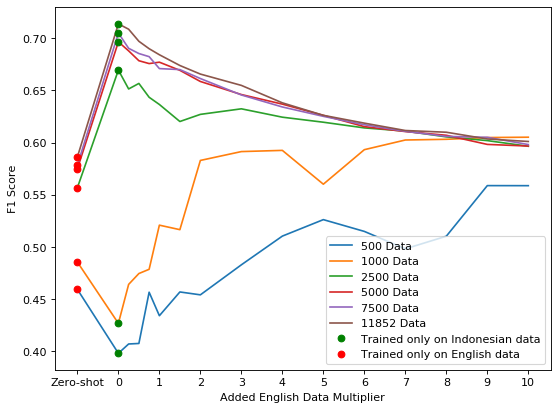

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 11852]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['foreign_mult'] == 0 )].foreign_mult.values,
data[(data['foreign_mult'] == 0)].f1.values,
'go',
label='Trained only on Indonesian data'.format(x))

plt.plot(data[(data['foreign_mult'] == -1)].foreign_mult.values,
data[(data['foreign_mult'] == -1)].f1.values,
'ro',
label='Trained only on English data'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Added English Data Multiplier')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot-toxic-mbert-english.png',bbox_inches='tight', transparent="True", pad_inches=0)
plt.show()

In [8]:
total_data = [500, 1000, 2500, 5000, 7500, 11852]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0] - data[(data['total_data'] == x) & (data['foreign_mult'] == -1)].f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: -0.06119915935247433
Data 1000 diff: -0.05868060490385213
Data 2500 diff: 0.11259177793486419
Data 5000 diff: 0.1215209959330944
Data 7500 diff: 0.1265402775841924
Data 11852 diff: 0.12745876280943957
0.3682320500052641
Avg:  0.061372008334210686


In [9]:
total_data = [500, 1000, 2500, 5000, 7500, 11852]
gains = 0
gains_list = []
for x in total_data:
    cur_gains = max(data[(data['total_data'] == x)].f1.values) - data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0]
    gains += cur_gains
    print("Data {} diff: {}".format(x, cur_gains))
    gains_list.append(cur_gains)
    
print(gains)
print("Avg: ", gains/len(total_data))

Data 500 diff: 0.16056351836372218
Data 1000 diff: 0.17823350011509753
Data 2500 diff: 0.0
Data 5000 diff: 0.0
Data 7500 diff: 0.0
Data 11852 diff: 0.0
0.3387970184788197
Avg:  0.05646616974646995


In [10]:
total_data[5] = 10000
df_gains = pd.DataFrame()
df_gains['data'] = total_data
df_gains['gain'] = gains_list
df_gains.to_csv('gains.csv', index=False)
df_gains.head(10)

,data,gain
0,500,0.160564
1,1000,0.178234
2,2500,0.000000
3,5000,0.000000
4,7500,0.000000
5,10000,0.000000


In [11]:
data[(data['total_data'] == 500)]

,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
0,500,-1.00,3.5,500.0,0.459373,0.568627,0.576516
1,500,0.00,3.5,0.0,0.398174,0.953716,0.556552
2,500,0.25,3.5,125.0,0.407097,0.907661,0.557701
3,500,0.50,3.5,250.0,0.407595,0.947560,0.558082
4,500,0.75,3.5,375.0,0.456673,0.919745,0.568995
5,500,1.00,3.5,500.0,0.434162,0.931601,0.563749
6,500,1.50,3.5,750.0,0.456914,0.896945,0.567571
7,500,2.00,3.5,1000.0,0.454154,0.903557,0.568209
8,500,3.00,3.5,1500.0,0.482899,0.906293,0.577056
9,500,4.00,3.5,2000.0,0.510389,0.917237,0.588826
